In [50]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
filename = 'ba_example'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/ba_example_out.wav')

In [52]:
f, t, Sxx = scipy.signal.spectrogram(tutor, sr)

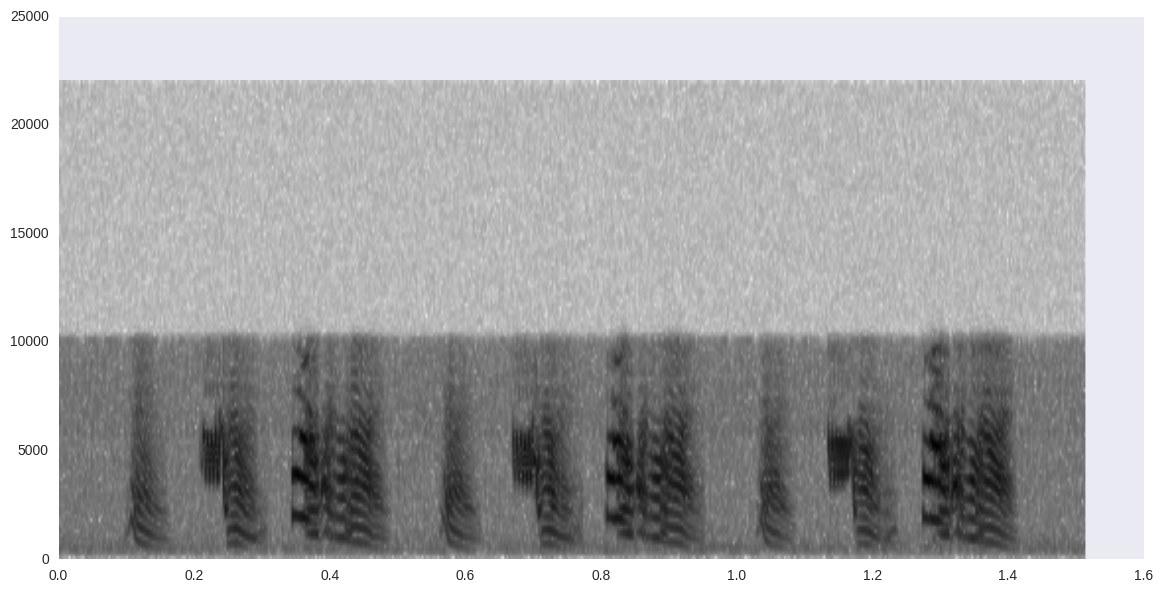

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


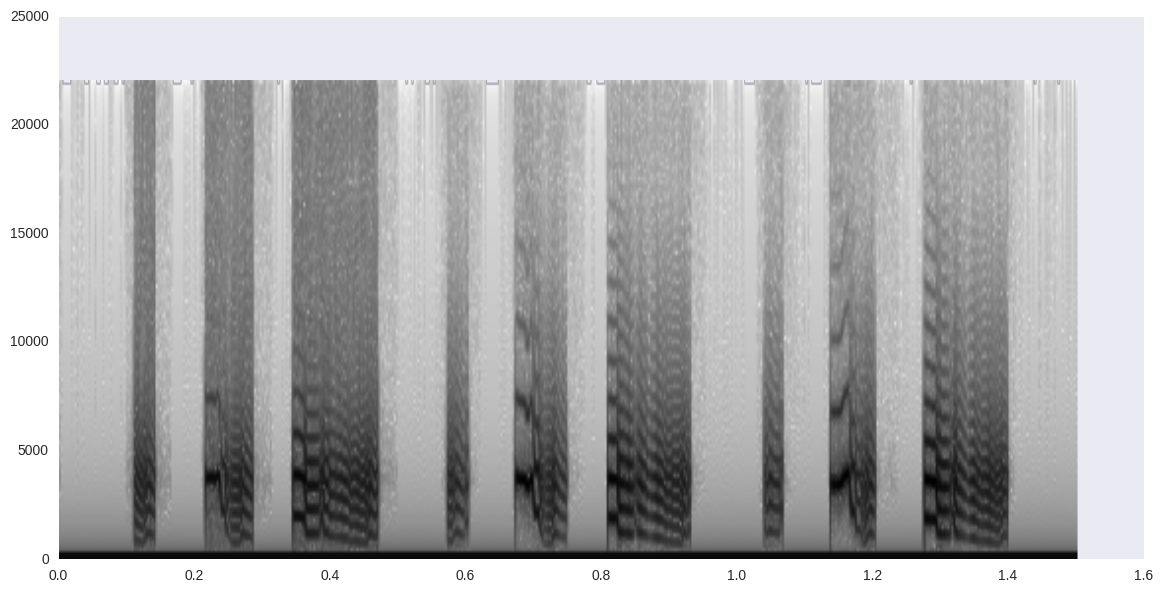

In [53]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(ba_learnt, Fs=sr)
ax.grid(False)
plt.show()

In [54]:
from python_speech_features import mfcc

In [55]:
tutor_mfcc = mfcc(tutor, sr)[..., 1:]
ba_learnt_mfcc = mfcc(ba_learnt, sr)[..., 1:]
np.linalg.norm(tutor_mfcc[:149] - ba_learnt_mfcc)

746.41569061103758

# Focus on syllable B of Buenos Aires song

In [56]:
filename = 'ba_syllable_b'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))

In [57]:
sr, ba_learnt = scipy.io.wavfile.read('../data/ba_syllable_out.wav')

FileNotFoundError: [Errno 2] No such file or directory: '../data/ba_syllable_out.wav'

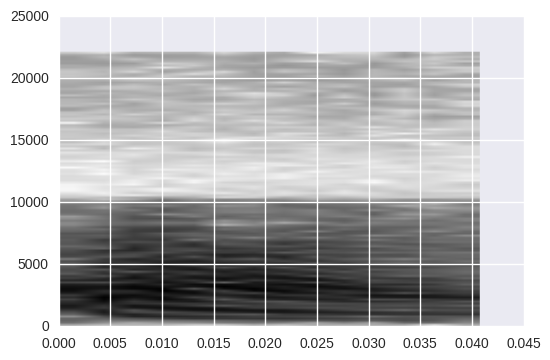

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


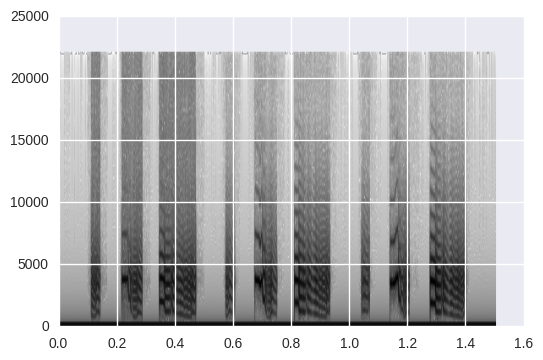

In [58]:
plt.specgram(tutor, Fs=sr)
plt.show()
plt.specgram(ba_learnt, Fs=sr)
plt.show()

In [59]:
tutor_mfcc = mfcc(tutor, sr)[..., 1:]
ba_learnt_mfcc = mfcc(ba_learnt, sr)[..., 1:]
np.linalg.norm(tutor_mfcc[0:2] - ba_learnt_mfcc[0:2])

98.776886682899558

# Have a look at $\alpha$ & $\beta$

In [60]:
dat = np.loadtxt('../model/test/comparison_files/ba_example_ab.dat')

Let us remove flat zone and high spikes

In [61]:
alpha = dat[:, 0]
alpha[np.where(np.abs(alpha) < 0.1)] = np.nan
beta = dat[:, 1]
beta[np.where(np.abs(beta - 0.15) < 0.1)] = np.nan

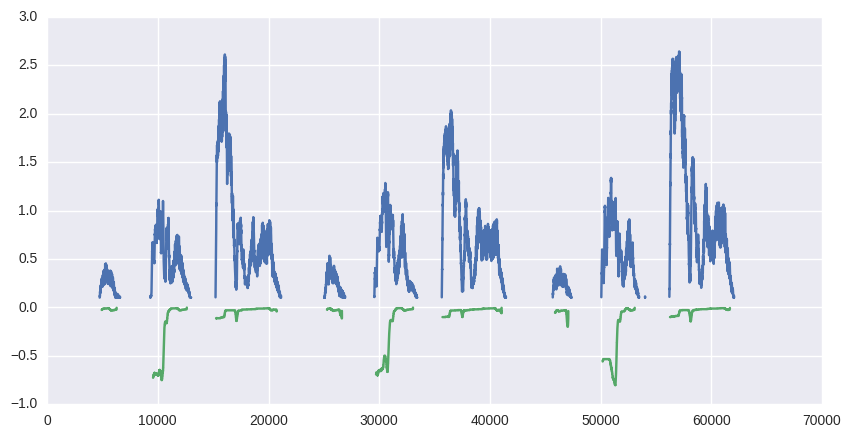

In [62]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alpha)
ax.plot(beta)
plt.show(fig)

4748 6168


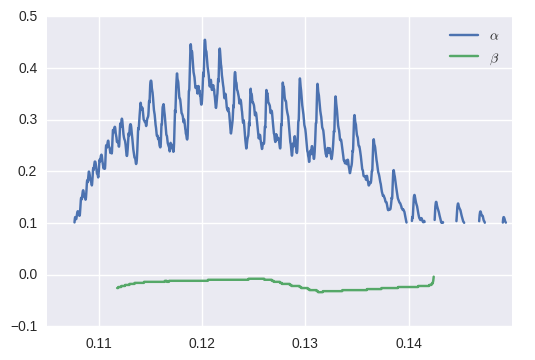

9329 12899


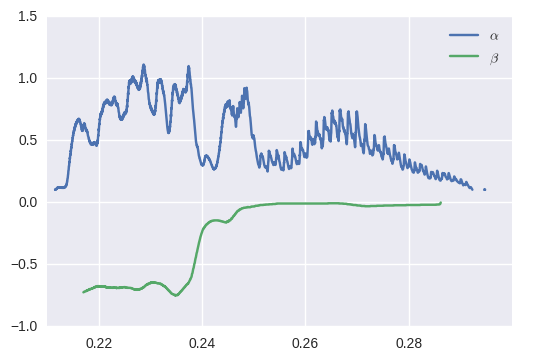

15213 21053


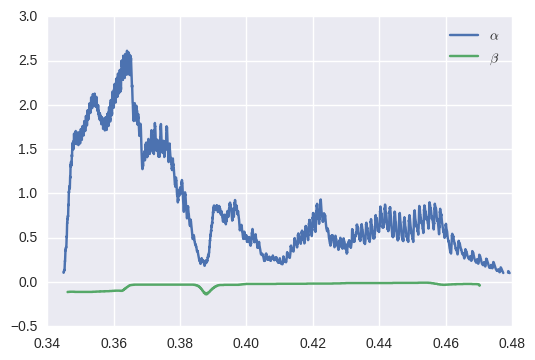

25057 26847


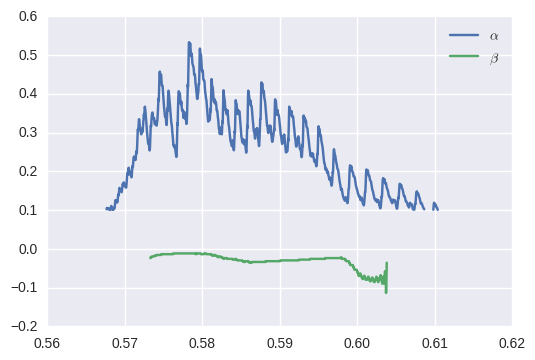

29558 33388


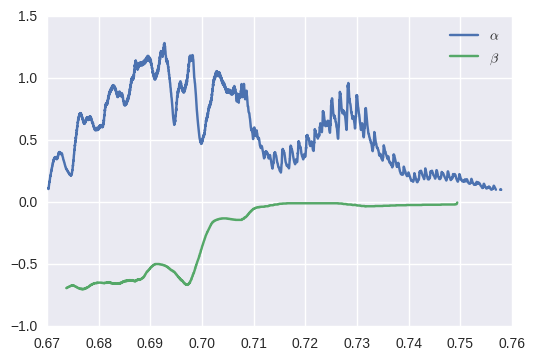

35649 41399


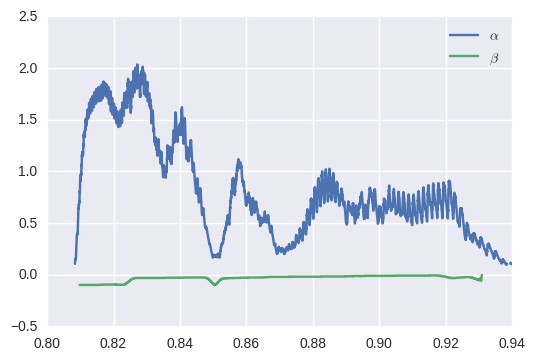

45673 47333


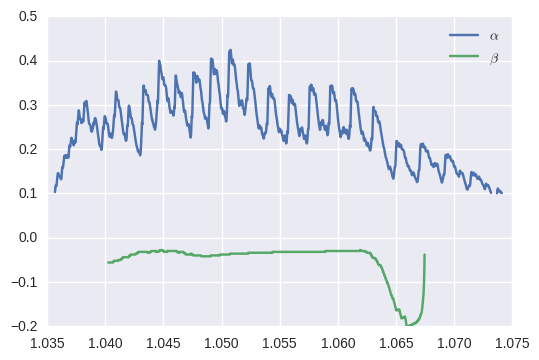

50059 53429


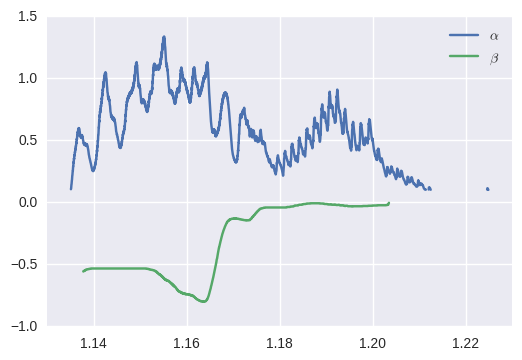

56206 62006


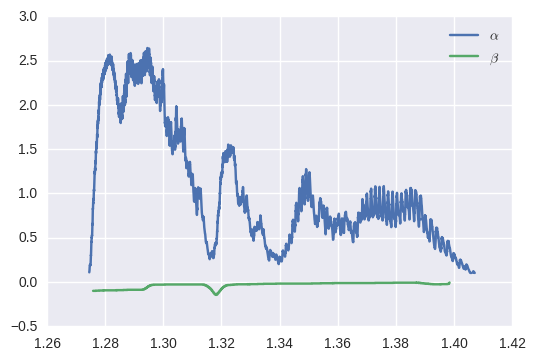

In [63]:
i = 0
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(np.arange(i-1000, j+1000)/sr, alpha[(i-1000):(j+1000)], label=r"$\alpha$")
            plt.plot(np.arange(i-1000, j+1000)/sr, beta[(i-1000):(j+1000)], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1

# Let's see with other birdsongs

In [43]:
sr, tutor = scipy.io.wavfile.read('../data/bells.wav')

dat = np.loadtxt('../data/bells_ab.dat')
pos = np.where(np.abs(np.diff(dat)) >= 1)[0]
#dat[pos] = np.nan

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


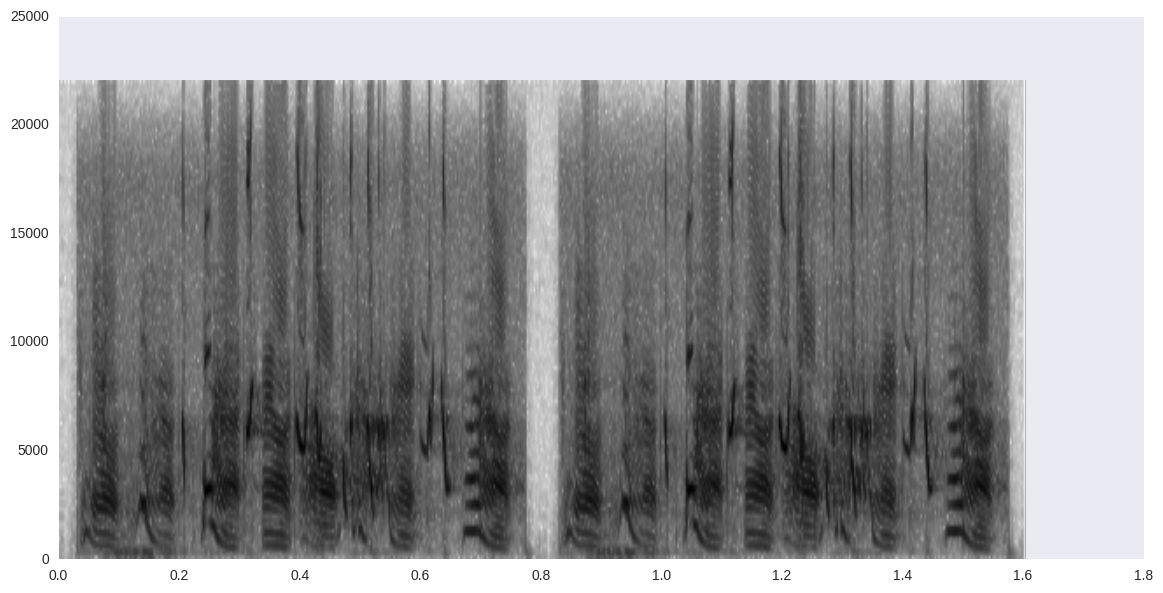

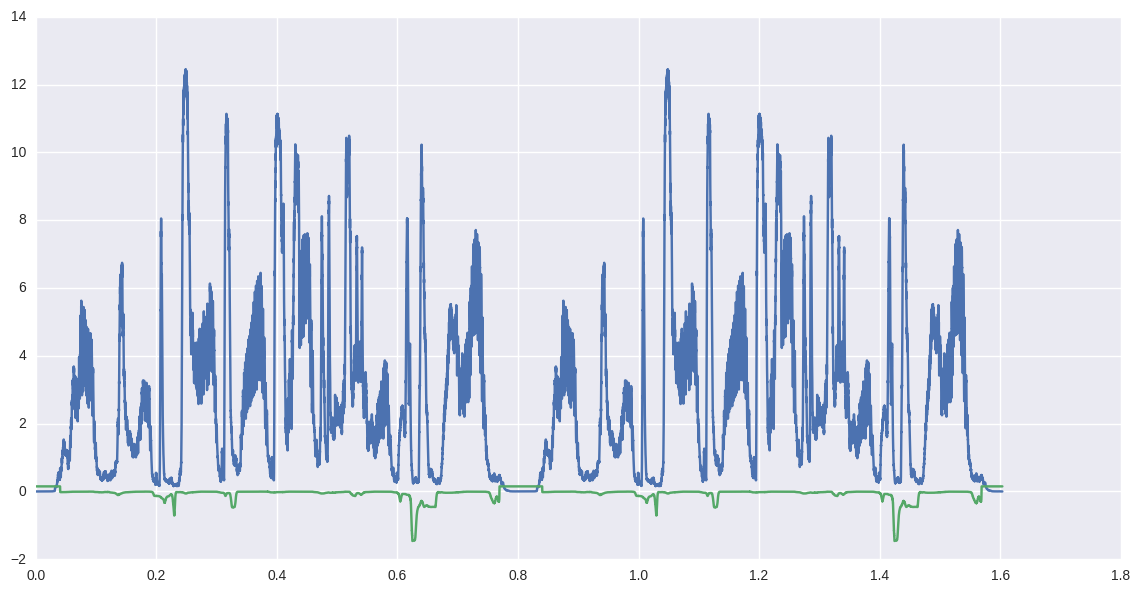

In [44]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.plot(np.arange(dat.shape[0])/sr, dat)

plt.show()

How it should be according to BA

![fit in a nice way](pretty_fit_ab_spec.png)

Let us remove flat zone and high spikes

In [45]:
alpha = dat[:, 0]
alpha[np.where(np.abs(alpha) < 0.1)] = np.nan
beta = dat[:, 1]
beta[np.where(np.abs(beta - 0.15) < 0.1)] = np.nan

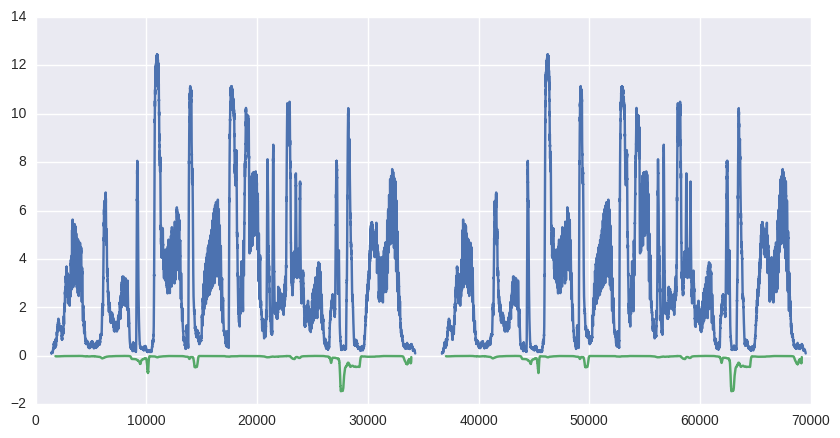

In [46]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alpha)
ax.plot(beta)
plt.show(fig)

1415 34285


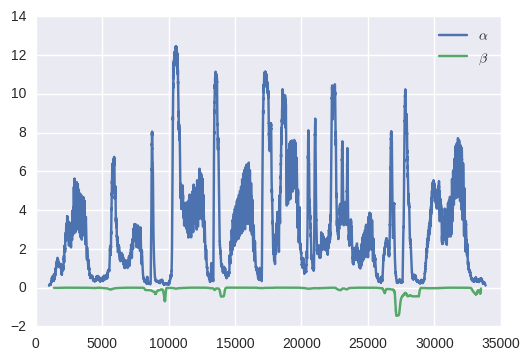

36686 69556


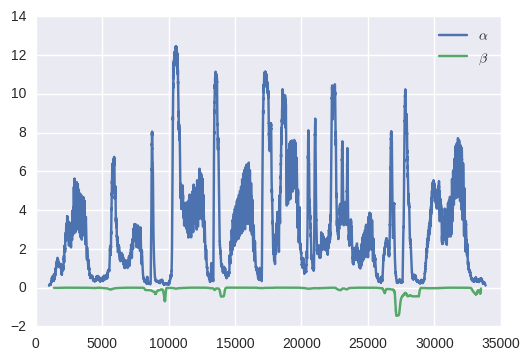

In [47]:
i = 0
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(alpha[(i-1000):(j+1000)], label=r"$\alpha$")
            plt.plot(beta[(i-1000):(j+1000)], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1